# 피자 가게 데이터 분석

## 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
orders_df = pd.read_csv('orders.csv')

In [3]:
pizza_types_df = pd.read_csv('pizza_types.csv')

In [4]:
pizzas_df = pd.read_csv('pizzas.csv')

#### order_id : 주문 아이디
#### order_timestamp : 주문 일시
#### order_details_id : 상세 주문 아이디
#### pizza_id : 피자 아이디
#### quantity : 수량

In [5]:
orders_df.head(10)

,order_id,order_timestamp,order_details_id,pizza_id,quantity
0,1,2023-01-01 11:45:11,1,hawaiian_m,1
1,2,2023-01-01 11:53:26,2,big_meat_l,1
2,2,2023-01-01 11:53:26,3,classic_dlx_m,1
3,2,2023-01-01 11:53:26,4,five_cheese_l,1
4,2,2023-01-01 11:53:26,5,potato_m,1
5,2,2023-01-01 11:53:26,6,thai_ckn_l,1
6,3,2023-01-01 11:54:22,7,pepperoni_l,1
7,3,2023-01-01 11:54:22,8,super_supreme_m,1
8,4,2023-01-01 12:09:18,9,big_meat_m,1
9,5,2023-01-01 12:15:29,10,super_supreme_m,1


In [6]:
pizzas_df.head(10)

,pizza_id,pizza_name,size,price
0,bbq_ckn_s,바비큐 치킨 피자,S,11300
1,bbq_ckn_m,바비큐 치킨 피자,M,22000
2,bbq_ckn_l,바비큐 치킨 피자,L,34000
3,thai_ckn_s,타이 치킨 피자,S,12300
4,thai_ckn_m,타이 치킨 피자,M,24000
5,thai_ckn_l,타이 치킨 피자,L,36800
6,big_meat_s,빅 미트 피자,S,11300
7,big_meat_m,빅 미트 피자,M,22000
8,big_meat_l,빅 미트 피자,L,34000
9,classic_dlx_s,클래식 디럭스 피자,S,10800


In [7]:
pizza_types_df.head(10)

,pizza_name,category,ingredients
0,바비큐 치킨 피자,치킨,"치킨, 피망, 토마토, 적양파, 바비큐 소스"
1,타이 치킨 피자,치킨,"치킨, 파인애플, 토마토, 피망, 타이 칠리 소스"
2,빅 미트 피자,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조"
3,클래식 디럭스 피자,클래식,"토마토, 페퍼로니, 버섯, 적양파, 피망, 베이컨"
4,슈퍼 슈프림 피자,클래식,"페퍼로니, 토마토, 적양파, 그린 올리브, 옥수수, 마늘"
5,페퍼로니 피자,클래식,"토마토, 모짜렐라 치즈, 페퍼로니"
6,포테이토 피자,스페셜,"모짜렐라 치즈, 토마토, 감자, 양파, 베이컨, 옥수수, 마요네즈"
7,하와이안 피자,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈"
8,불고기 피자,스페셜,"불고기, 불고기 소스, 버섯, 양파, 피망, 모짜렐라 치즈"
9,프로슈토 루꼴라 피자,스페셜,"프로슈토, 루꼴라, 모짜렐라 치즈"


## 데이터 전처리

In [8]:
merged_order_pizza = pd.merge(orders_df,pizzas_df, how='left', on='pizza_id')
merged_order_pizza.head()

,order_id,order_timestamp,order_details_id,pizza_id,quantity,pizza_name,size,price
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800
1,2,2023-01-01 11:53:26,2,big_meat_l,1,빅 미트 피자,L,34000
2,2,2023-01-01 11:53:26,3,classic_dlx_m,1,클래식 디럭스 피자,M,20300
3,2,2023-01-01 11:53:26,4,five_cheese_l,1,파이브 치즈 피자,L,31000
4,2,2023-01-01 11:53:26,5,potato_m,1,포테이토 피자,M,21800


In [9]:
merged_order_pizza['total_price'] = merged_order_pizza['quantity'] * merged_order_pizza['price']
merged_order_pizza = merged_order_pizza.rename(columns={'price' : 'unit_price'})   
merged_order_pizza.head(10)

,order_id,order_timestamp,order_details_id,pizza_id,quantity,pizza_name,size,unit_price,total_price
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800,21800
1,2,2023-01-01 11:53:26,2,big_meat_l,1,빅 미트 피자,L,34000,34000
2,2,2023-01-01 11:53:26,3,classic_dlx_m,1,클래식 디럭스 피자,M,20300,20300
3,2,2023-01-01 11:53:26,4,five_cheese_l,1,파이브 치즈 피자,L,31000,31000
4,2,2023-01-01 11:53:26,5,potato_m,1,포테이토 피자,M,21800,21800
5,2,2023-01-01 11:53:26,6,thai_ckn_l,1,타이 치킨 피자,L,36800,36800
6,3,2023-01-01 11:54:22,7,pepperoni_l,1,페퍼로니 피자,L,28300,28300
7,3,2023-01-01 11:54:22,8,super_supreme_m,1,슈퍼 슈프림 피자,M,20300,20300
8,4,2023-01-01 12:09:18,9,big_meat_m,1,빅 미트 피자,M,22000,22000
9,5,2023-01-01 12:15:29,10,super_supreme_m,1,슈퍼 슈프림 피자,M,20300,20300


In [10]:
pizza_orders_df = pd.merge(merged_order_pizza,pizza_types_df, how='left', on='pizza_name')
pizza_orders_df.head()

,order_id,order_timestamp,order_details_id,pizza_id,quantity,pizza_name,size,unit_price,total_price,category,ingredients
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800,21800,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈"
1,2,2023-01-01 11:53:26,2,big_meat_l,1,빅 미트 피자,L,34000,34000,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조"
2,2,2023-01-01 11:53:26,3,classic_dlx_m,1,클래식 디럭스 피자,M,20300,20300,클래식,"토마토, 페퍼로니, 버섯, 적양파, 피망, 베이컨"
3,2,2023-01-01 11:53:26,4,five_cheese_l,1,파이브 치즈 피자,L,31000,31000,베지테리언,"모짜렐라 치즈, 프로볼로네 치즈, 고다 치즈, 페코리노 치즈, 고르곤졸라 치즈"
4,2,2023-01-01 11:53:26,5,potato_m,1,포테이토 피자,M,21800,21800,스페셜,"모짜렐라 치즈, 토마토, 감자, 양파, 베이컨, 옥수수, 마요네즈"


## 데이터 탐색하기

In [11]:
pizza_orders_df.shape

(47079, 11)

In [12]:
pizza_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47079 entries, 0 to 47078
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          47079 non-null  int64 
 1   order_timestamp   47079 non-null  object
 2   order_details_id  47079 non-null  int64 
 3   pizza_id          47079 non-null  object
 4   quantity          47079 non-null  int64 
 5   pizza_name        47079 non-null  object
 6   size              47079 non-null  object
 7   unit_price        47079 non-null  int64 
 8   total_price       47079 non-null  int64 
 9   category          47079 non-null  object
 10  ingredients       47079 non-null  object
dtypes: int64(5), object(6)
memory usage: 4.0+ MB


In [13]:
pizza_orders_df.describe(include='all')

,order_id,order_timestamp,order_details_id,pizza_id,quantity,pizza_name,size,unit_price,total_price,category,ingredients
count,47079.000000,47079,47079.000000,47079,47079.000000,47079,47079,47079.000000,47079.000000,47079,47079
unique,NaN,21350,NaN,39,NaN,13,3,NaN,NaN,4,13
top,NaN,2023-11-18 21:10:53,NaN,thai_ckn_l,NaN,하와이안 피자,L,NaN,NaN,클래식,"토마토, 베이컨, 파인애플, 모짜렐라 치즈"
freq,NaN,19,NaN,2495,NaN,5909,18378,NaN,NaN,17437,5909
mean,10708.712058,NaN,23540.000000,NaN,1.052996,NaN,NaN,22945.597825,24233.356698,NaN,NaN
std,6175.450615,NaN,13590.680998,NaN,0.242338,NaN,NaN,9376.523771,11887.470629,NaN,NaN
min,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,9300.000000,9300.000000,NaN,NaN
25%,5352.500000,NaN,11770.500000,NaN,1.000000,NaN,NaN,11300.000000,12300.000000,NaN,NaN
50%,10696.000000,NaN,23540.000000,NaN,1.000000,NaN,NaN,21800.000000,22000.000000,NaN,NaN
75%,16100.500000,NaN,35309.500000,NaN,1.000000,NaN,NaN,32300.000000,33800.000000,NaN,NaN


In [14]:
print(pizza_orders_df['pizza_name'].unique())
print(pizza_orders_df['size'].unique())
print(pizza_orders_df['category'].unique())

['하와이안 피자' '빅 미트 피자' '클래식 디럭스 피자' '파이브 치즈 피자' '포테이토 피자' '타이 치킨 피자'
 '페퍼로니 피자' '슈퍼 슈프림 피자' '바비큐 치킨 피자' '프로슈토 루꼴라 피자' '그린 가든 피자' '시금치 페스토 피자'
 '불고기 피자']
['M' 'L' 'S']
['스페셜' '클래식' '베지테리언' '치킨']


In [15]:
pizza_orders_df['order_timestamp'] = pd.to_datetime(pizza_orders_df['order_timestamp'])
pizza_orders_df['order_timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 47079 entries, 0 to 47078
Series name: order_timestamp
Non-Null Count  Dtype         
--------------  -----         
47079 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 367.9 KB


In [16]:
print('첫 주문 일시:', pizza_orders_df['order_timestamp'].min())
print('마지막 주문 일시:', pizza_orders_df['order_timestamp'].max())

첫 주문 일시: 2023-01-01 11:45:11
마지막 주문 일시: 2023-12-31 21:56:56


## 종합 결산

In [17]:
total_days = pizza_orders_df['order_timestamp'].dt.date.nunique()
print(f"영업일 수: {total_days}일")

영업일 수: 358일


In [18]:
total_sales = pizza_orders_df['total_price'].sum()
print(f"총매출: {total_sales:,.0f}원")

총매출: 1,140,882,200원


In [19]:
sales_per_day = total_sales / total_days
print(f"하루 매출 : {sales_per_day:,.0f}원")

하루 매출 : 3,186,822원


In [20]:
total_orders = pizza_orders_df['order_id'].nunique()
print(f"주문 횟수: {total_orders:,.0f}회")

주문 횟수: 21,350회


In [21]:
avg_purchase_price = total_sales / total_orders
print(f"평균 주문 금액 : {avg_purchase_price:,.0f}원")

평균 주문 금액 : 53,437원


In [22]:
total_quantity = pizza_orders_df['quantity'].sum()
print(f"총 판매량: {total_quantity:,.0f}판")

총 판매량: 49,574판


In [23]:
quantity_per_order = pizza_orders_df.groupby('order_id')['quantity'].sum()
quantity_per_order = quantity_per_order.sort_values(ascending=False)
quantity_per_order.head()

order_id
18845    28
10760    25
18513    15
21158    15
20163    15
Name: quantity, dtype: int64

In [24]:
pizza_orders_df[pizza_orders_df['order_id'] == 18845]

,order_id,order_timestamp,order_details_id,pizza_id,quantity,pizza_name,size,unit_price,total_price,category,ingredients
41491,18845,2023-11-18 21:10:53,41492,bbq_ckn_m,3,바비큐 치킨 피자,M,22000,66000,치킨,"치킨, 피망, 토마토, 적양파, 바비큐 소스"
41492,18845,2023-11-18 21:10:53,41493,big_meat_l,1,빅 미트 피자,L,34000,34000,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조"
41493,18845,2023-11-18 21:10:53,41494,big_meat_s,2,빅 미트 피자,S,11300,22600,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조"
41494,18845,2023-11-18 21:10:53,41495,bulgogi_l,1,불고기 피자,L,32300,32300,스페셜,"불고기, 불고기 소스, 버섯, 양파, 피망, 모짜렐라 치즈"
41495,18845,2023-11-18 21:10:53,41496,classic_dlx_m,1,클래식 디럭스 피자,M,20300,20300,클래식,"토마토, 페퍼로니, 버섯, 적양파, 피망, 베이컨"
41496,18845,2023-11-18 21:10:53,41497,classic_dlx_s,1,클래식 디럭스 피자,S,10800,10800,클래식,"토마토, 페퍼로니, 버섯, 적양파, 피망, 베이컨"
41497,18845,2023-11-18 21:10:53,41498,green_garden_m,1,그린 가든 피자,M,21800,21800,베지테리언,"가지, 아티초크, 토마토, 쥬키니, 피망, 마늘, 페스토 소스"
41498,18845,2023-11-18 21:10:53,41499,hawaiian_l,2,하와이안 피자,L,33800,67600,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈"
41499,18845,2023-11-18 21:10:53,41500,hawaiian_m,2,하와이안 피자,M,21800,43600,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈"
41500,18845,2023-11-18 21:10:53,41501,hawaiian_s,2,하와이안 피자,S,11000,22000,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈"


# 매장 분석 II: 시간에 따른 매출

In [25]:
pizza_orders_df['month'] = pizza_orders_df['order_timestamp'].dt.month
pizza_orders_df.head()

,order_id,order_timestamp,order_details_id,pizza_id,quantity,pizza_name,size,unit_price,total_price,category,ingredients,month
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800,21800,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈",1
1,2,2023-01-01 11:53:26,2,big_meat_l,1,빅 미트 피자,L,34000,34000,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조",1
2,2,2023-01-01 11:53:26,3,classic_dlx_m,1,클래식 디럭스 피자,M,20300,20300,클래식,"토마토, 페퍼로니, 버섯, 적양파, 피망, 베이컨",1
3,2,2023-01-01 11:53:26,4,five_cheese_l,1,파이브 치즈 피자,L,31000,31000,베지테리언,"모짜렐라 치즈, 프로볼로네 치즈, 고다 치즈, 페코리노 치즈, 고르곤졸라 치즈",1
4,2,2023-01-01 11:53:26,5,potato_m,1,포테이토 피자,M,21800,21800,스페셜,"모짜렐라 치즈, 토마토, 감자, 양파, 베이컨, 옥수수, 마요네즈",1


## 월별 매출 집계

In [26]:
sales_by_month = pizza_orders_df.groupby('month')['total_price'].sum().reset_index()
sales_by_month

,month,total_price
0,1,93718700
1,2,89392300
2,3,98494600
3,4,96277400
4,5,100225300
5,6,95518100
6,7,101553600
7,8,94873600
8,9,89302500
9,10,88423800


## 월별 매출 추이 시각화

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

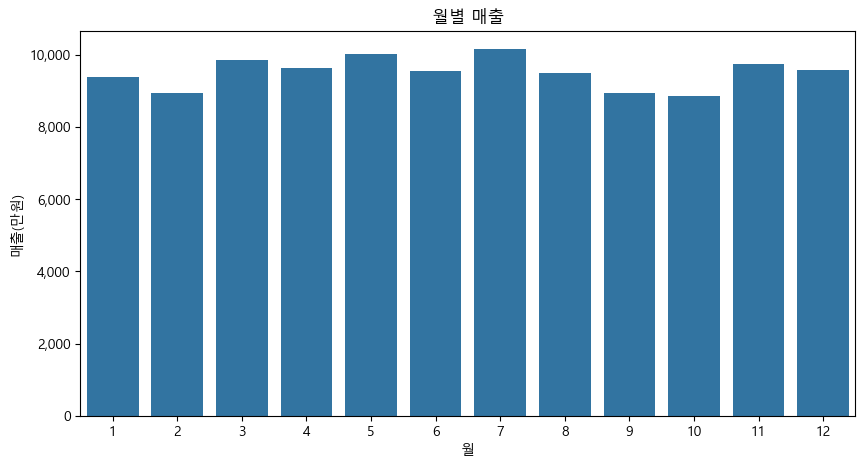

In [28]:
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot(data=sales_by_month, x='month',y='total_price')
plt.title('월별 매출')
plt.xlabel('월')
plt.ylabel('매출(만원)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/10000:,.0f}'))
plt.show()

## 요일별 매출

In [29]:
pizza_orders_df['day'] = pizza_orders_df['order_timestamp'].dt.dayofweek
pizza_orders_df.head()

,order_id,order_timestamp,order_details_id,pizza_id,quantity,pizza_name,size,unit_price,total_price,category,ingredients,month,day
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800,21800,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈",1,6
1,2,2023-01-01 11:53:26,2,big_meat_l,1,빅 미트 피자,L,34000,34000,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조",1,6
2,2,2023-01-01 11:53:26,3,classic_dlx_m,1,클래식 디럭스 피자,M,20300,20300,클래식,"토마토, 페퍼로니, 버섯, 적양파, 피망, 베이컨",1,6
3,2,2023-01-01 11:53:26,4,five_cheese_l,1,파이브 치즈 피자,L,31000,31000,베지테리언,"모짜렐라 치즈, 프로볼로네 치즈, 고다 치즈, 페코리노 치즈, 고르곤졸라 치즈",1,6
4,2,2023-01-01 11:53:26,5,potato_m,1,포테이토 피자,M,21800,21800,스페셜,"모짜렐라 치즈, 토마토, 감자, 양파, 베이컨, 옥수수, 마요네즈",1,6


In [30]:
sales_by_day = pizza_orders_df.groupby('day')['total_price'].sum().reset_index()
sales_by_day

,day,total_price
0,0,147541300
1,1,160866900
2,2,165848400
3,3,168921600
4,4,185106800
5,5,169516300
6,6,143080900


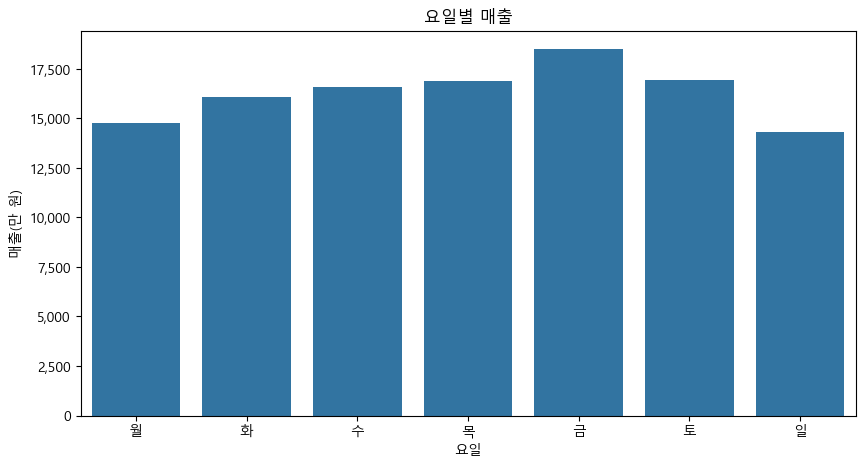

In [31]:
day_names = ['월','화','수','목','금','토','일']
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot(data=sales_by_day, x=day_names, y='total_price')
plt.title('요일별 매출')
plt.xlabel('요일')
plt.ylabel('매출(만 원)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/10000:,.0f}'))
plt.show()

## 시간대별 매출

In [32]:
pizza_orders_df['hour'] = pizza_orders_df['order_timestamp'].dt.hour
pizza_orders_df.head()

,order_id,order_timestamp,order_details_id,pizza_id,quantity,pizza_name,size,unit_price,total_price,category,ingredients,month,day,hour
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800,21800,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈",1,6,11
1,2,2023-01-01 11:53:26,2,big_meat_l,1,빅 미트 피자,L,34000,34000,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조",1,6,11
2,2,2023-01-01 11:53:26,3,classic_dlx_m,1,클래식 디럭스 피자,M,20300,20300,클래식,"토마토, 페퍼로니, 버섯, 적양파, 피망, 베이컨",1,6,11
3,2,2023-01-01 11:53:26,4,five_cheese_l,1,파이브 치즈 피자,L,31000,31000,베지테리언,"모짜렐라 치즈, 프로볼로네 치즈, 고다 치즈, 페코리노 치즈, 고르곤졸라 치즈",1,6,11
4,2,2023-01-01 11:53:26,5,potato_m,1,포테이토 피자,M,21800,21800,스페셜,"모짜렐라 치즈, 토마토, 감자, 양파, 베이컨, 옥수수, 마요네즈",1,6,11


In [33]:
sales_by_hour = pizza_orders_df.groupby('hour')['total_price'].sum().reset_index()
sales_by_hour

,hour,total_price
0,10,461000
1,11,64896300
2,12,131185900
3,13,140566100
4,14,82838800
5,15,81688100
6,16,106494800
7,17,122837100
8,18,124612100
9,19,102778400


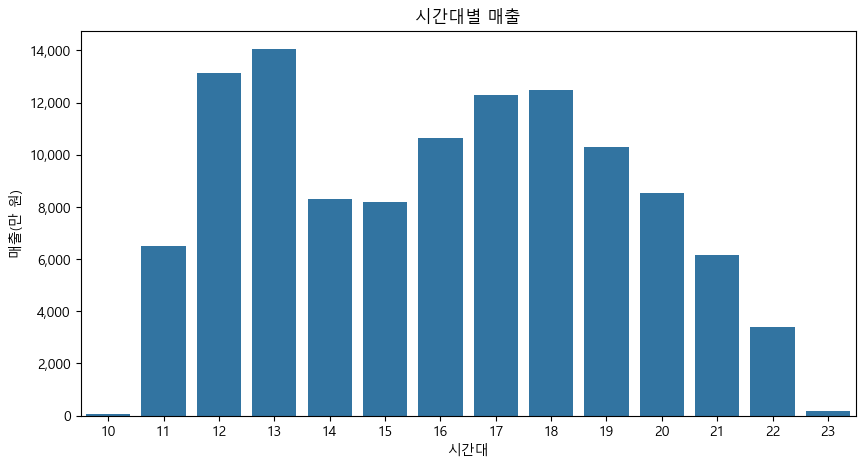

In [34]:
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot(data=sales_by_hour,x='hour',y='total_price')
plt.title('시간대별 매출')
plt.xlabel('시간대')
plt.ylabel('매출(만 원)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/10000:,.0f}'))

## 평일과 휴일의 시간대별 매출

In [35]:
pizza_orders_df['type_of_day'] = pizza_orders_df['day'].apply(lambda x: '휴일' if x >=5 else '평일')
pizza_orders_df.head()

,order_id,order_timestamp,order_details_id,pizza_id,quantity,pizza_name,size,unit_price,total_price,category,ingredients,month,day,hour,type_of_day
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800,21800,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈",1,6,11,휴일
1,2,2023-01-01 11:53:26,2,big_meat_l,1,빅 미트 피자,L,34000,34000,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조",1,6,11,휴일
2,2,2023-01-01 11:53:26,3,classic_dlx_m,1,클래식 디럭스 피자,M,20300,20300,클래식,"토마토, 페퍼로니, 버섯, 적양파, 피망, 베이컨",1,6,11,휴일
3,2,2023-01-01 11:53:26,4,five_cheese_l,1,파이브 치즈 피자,L,31000,31000,베지테리언,"모짜렐라 치즈, 프로볼로네 치즈, 고다 치즈, 페코리노 치즈, 고르곤졸라 치즈",1,6,11,휴일
4,2,2023-01-01 11:53:26,5,potato_m,1,포테이토 피자,M,21800,21800,스페셜,"모짜렐라 치즈, 토마토, 감자, 양파, 베이컨, 옥수수, 마요네즈",1,6,11,휴일


In [36]:
sales_by_day_hour = pizza_orders_df.groupby(['type_of_day','hour'])['total_price'].sum().reset_index()
sales_by_day_hour

,type_of_day,hour,total_price
0,평일,10,360100
1,평일,11,53667500
2,평일,12,108928000
3,평일,13,112149900
4,평일,14,55954700
5,평일,15,55864800
6,평일,16,73311400
7,평일,17,88357300
8,평일,18,87425300
9,평일,19,69155400


## 평일 시간대별 매출

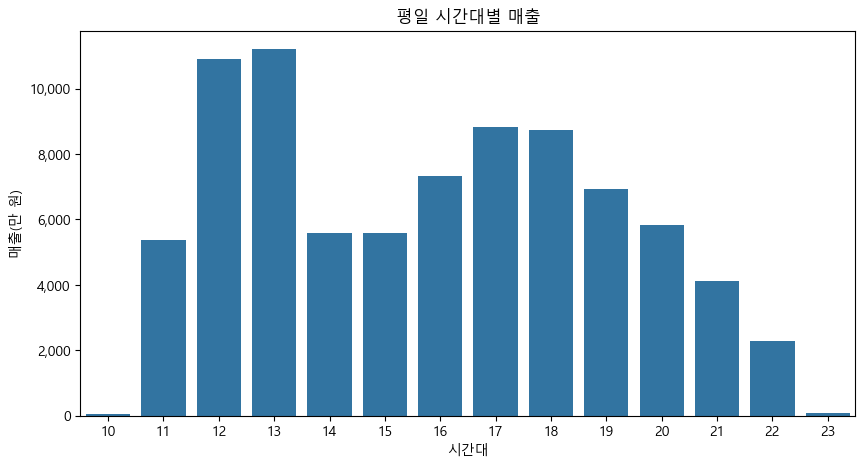

In [37]:
day_type = '평일'

plt.rcParams['figure.figsize']=(10,5)
target_data = sales_by_day_hour[sales_by_day_hour['type_of_day'] == day_type]
sns.barplot(data=target_data, x='hour',y='total_price')
plt.title(f'{day_type} 시간대별 매출')
plt.xlabel('시간대')
plt.ylabel('매출(만 원)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/10000:,.0f}'))
plt.show()

## 휴일 시간대별 매출

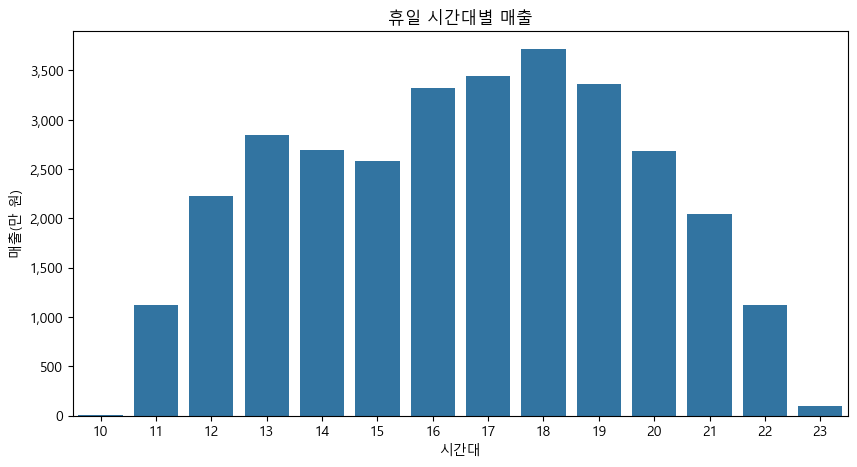

In [38]:
day_type = '휴일'

plt.rcParams['figure.figsize']=(10,5)
target_data = sales_by_day_hour[sales_by_day_hour['type_of_day'] == day_type]
sns.barplot(data=target_data, x='hour',y='total_price')
plt.title(f'{day_type} 시간대별 매출')
plt.xlabel('시간대')
plt.ylabel('매출(만 원)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/10000:,.0f}'))
plt.show()

### 결론: 
#### >> 평일에는 점심시간이 저녁 시간보다 매출이 잘나오는 반면,
#### >> 휴일에는 저녁 시간이 점심 시간보다 매출이 잘나온다.
#### >> 휴일에는 14시 ~ 17시 까지의 구간의 매출이 꽤 높다.
#### >> 평일과 휴일의 특수성을 고려해 인력을 배분하면 수월하게 영업이 가능할 것이다.

# 피자 메뉴별 판매량

In [41]:
pizzas_df.head(3)

,pizza_id,pizza_name,size,price
0,bbq_ckn_s,바비큐 치킨 피자,S,11300
1,bbq_ckn_m,바비큐 치킨 피자,M,22000
2,bbq_ckn_l,바비큐 치킨 피자,L,34000


In [44]:
quantity_by_pizza = pizza_orders_df.groupby('pizza_name')['quantity'].sum().reset_index()
quantity_by_pizza = quantity_by_pizza.sort_values(by='quantity',ascending=False)
quantity_by_pizza

,pizza_name,quantity
12,하와이안 피자,6316
9,페퍼로니 피자,6291
7,타이 치킨 피자,5432
6,클래식 디럭스 피자,4691
3,빅 미트 피자,4145
1,바비큐 치킨 피자,4065
8,파이브 치즈 피자,3609
10,포테이토 피자,3291
4,슈퍼 슈프림 피자,3279
0,그린 가든 피자,2621


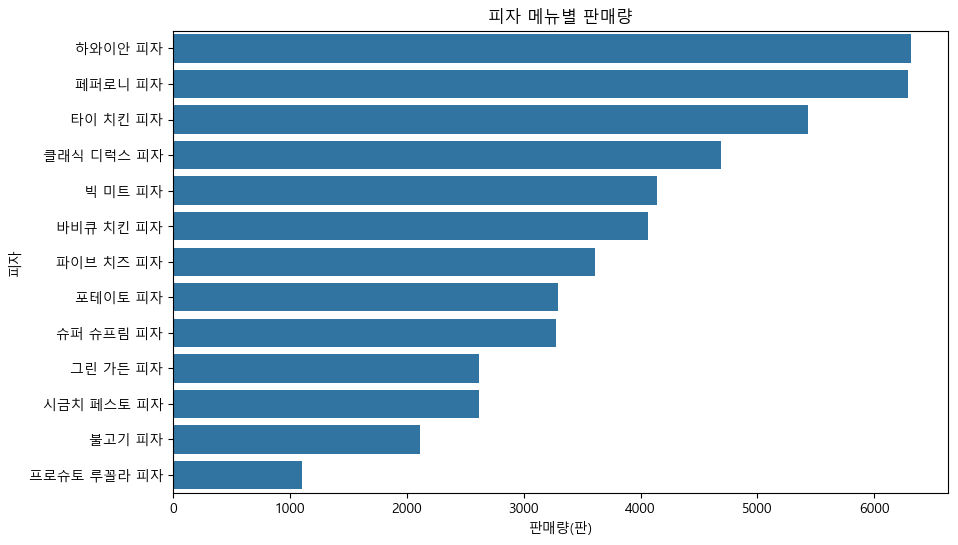

In [47]:
plt.rcParams['figure.figsize'] = (10,6)
sns.barplot(data=quantity_by_pizza, x='quantity', y='pizza_name')
plt.title('피자 메뉴별 판매량')
plt.xlabel('판매량(판)')
plt.ylabel('피자')
plt.show()

## 각 피자 메뉴의 월별 판매량

In [48]:
quantity_by_pizza_and_month = pizza_orders_df.groupby(['pizza_name','month'])['quantity'].sum().reset_index()
quantity_by_pizza_and_month

,pizza_name,month,quantity
0,그린 가든 피자,1,222
1,그린 가든 피자,2,212
2,그린 가든 피자,3,267
3,그린 가든 피자,4,209
4,그린 가든 피자,5,233
...,...,...,...
151,하와이안 피자,8,538
152,하와이안 피자,9,498
153,하와이안 피자,10,473
154,하와이안 피자,11,533


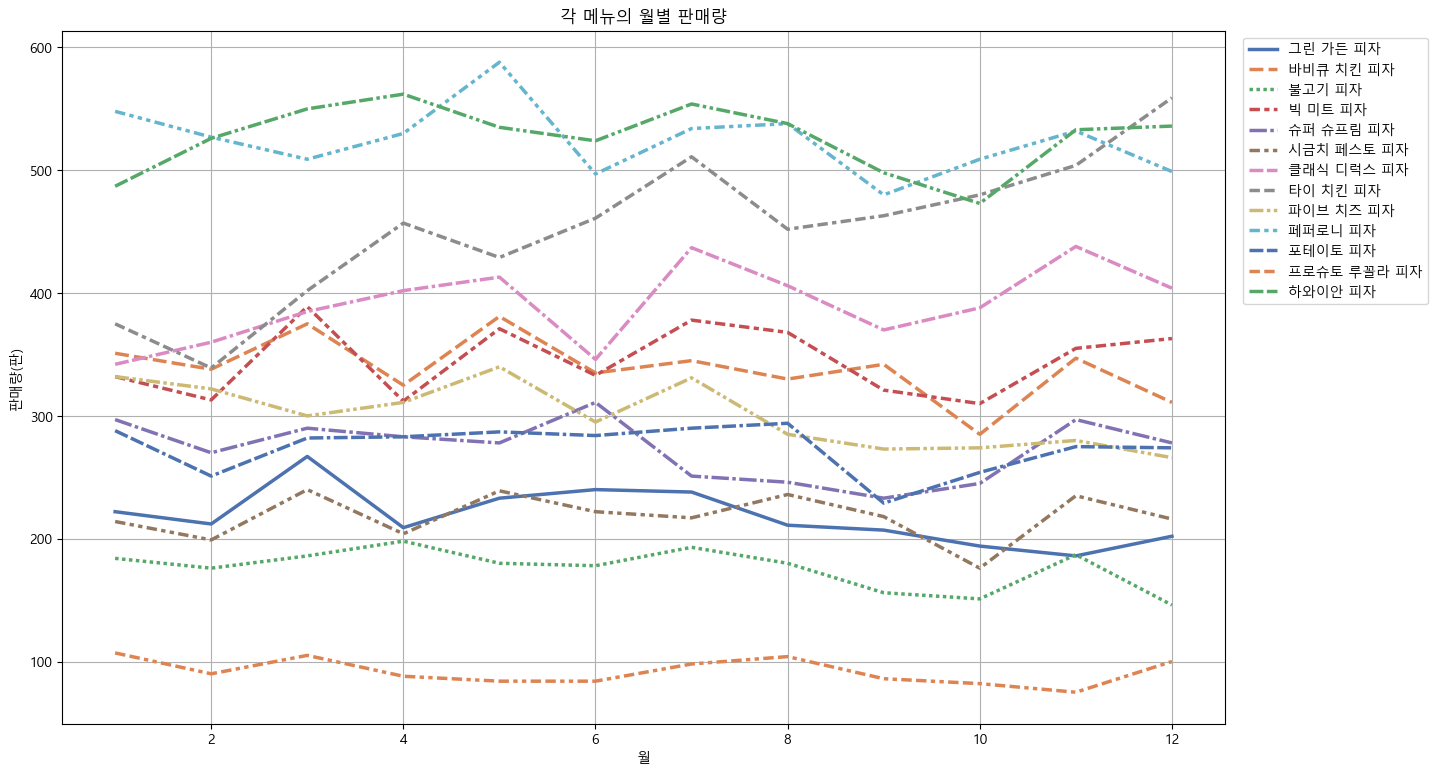

In [53]:
plt.rcParams['figure.figsize']=(15,9)
sns.lineplot(data=quantity_by_pizza_and_month, x='month',y='quantity', hue='pizza_name', style='pizza_name',palette='deep', linewidth=2.5)
plt.title('각 메뉴의 월별 판매량')
plt.xlabel('월')
plt.ylabel('판매량(판)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))
plt.show()

# 각 피자 메뉴의 사이즈별 판매량

In [54]:
quantity_by_pizza_and_size = pizza_orders_df.groupby(['pizza_name','size'])['quantity'].sum().reset_index()
quantity_by_pizza_and_size

,pizza_name,size,quantity
0,그린 가든 피자,L,746
1,그린 가든 피자,M,884
2,그린 가든 피자,S,991
3,바비큐 치킨 피자,L,1674
4,바비큐 치킨 피자,M,1528
5,바비큐 치킨 피자,S,863
6,불고기 피자,L,860
7,불고기 피자,M,691
8,불고기 피자,S,564
9,빅 미트 피자,L,905


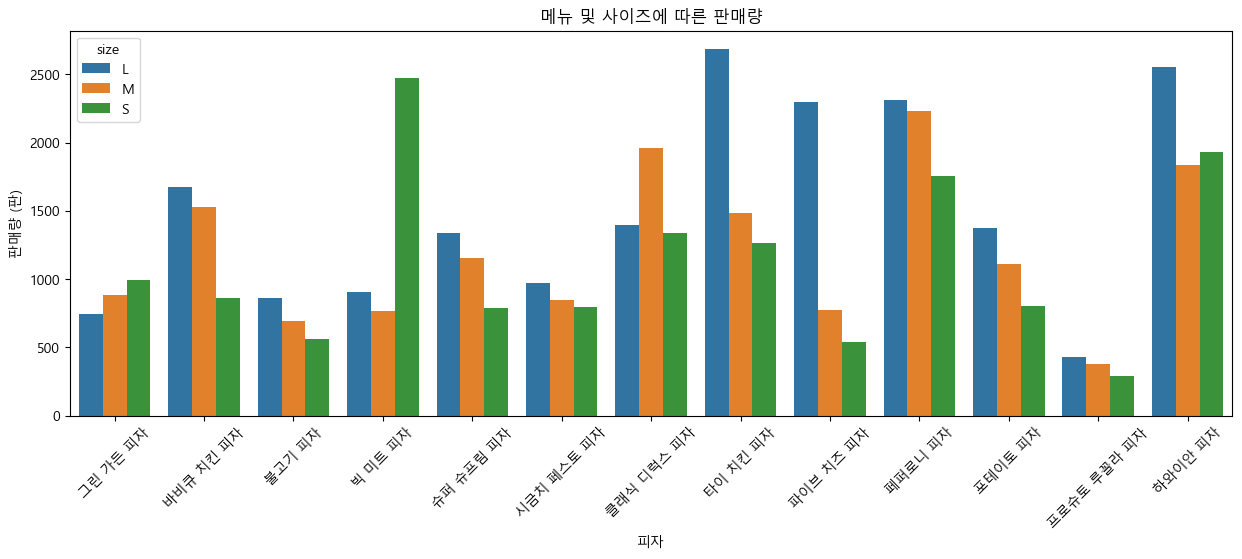

In [55]:
plt.rcParams['figure.figsize']=(15,5)
sns.barplot(data=quantity_by_pizza_and_size, x='pizza_name',y='quantity', hue='size')
plt.title('메뉴 및 사이즈에 따른 판매량')
plt.xlabel('피자')
plt.ylabel('판매량 (판)')
plt.xticks(rotation=45)
plt.show()

#### 대체로 L사이즈의 피자가 인기가 좋다
#### M사이즈 판매량이 가장 많은 피자는 클래식 디럭스 피자
#### S사이즈 판매량이 가장 많은 피자는 그린 가든 피자, 빅 미트 피자
#### 장기적으로 매출을 올리기 위해 사이즈별 판매량이 지나치게 차이나는 원인 파악필요